In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

The COVID-19 pandemic has posed many challenges to the Healthcare companies, for example, shifting consumer demands towards fast and convenient services. As a result, they are forced to take on digital transformations. On the other hand, big tech companies are also looking to occupy the niche markets in the Healthcare industry. Therefore, many companies in those two sectors formed partnetships. 

In this project, we hope to study the relationship between the two sectors by investigating their stock prices.

In [2]:
GOOGL = pd.read_csv('GOOGL.csv')
AMZN = pd.read_csv('AMZN.csv')
AAPL = pd.read_csv('AAPL.csv')
META = pd.read_csv('META.csv')
MSFT = pd.read_csv('MSFT.csv')

it_df = [GOOGL, AMZN, AAPL, META, MSFT]
for it in it_df:
    print(it.shape)

(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)


In [3]:
CVS = pd.read_csv('CVS.csv') # CVS Health Corp.
UNH = pd.read_csv('UNH.csv') # UnitedHealth Group Inc.
MCK = pd.read_csv('MCK.csv') # McKesson Corp. 
ABC = pd.read_csv('ABC.csv')
CI = pd.read_csv('CI.csv') 

#healthcare_df = [CVS[0], UNH[0], MCK[0], ABC[0], CI[0]]

### Model 1. Linear Regression

In this model, we would use the prices of other 9 stocks to predict the 

In [4]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()

In [5]:
X = pd.concat([AMZN["4. close"], AAPL["4. close"], 
               META["4. close"], MSFT["4. close"], 
               CVS["4. close"], UNH["4. close"], 
               MCK["4. close"], ABC["4. close"], 
               CI["4. close"]], axis=1)
y = GOOGL["4. close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  -162.15468305058812
Coefficients 	: a =  [ 0.08915926  0.27945452 -0.13694831  6.75198762  3.90246484  0.45762694
 -1.92998319  8.18146138 -2.99789666]


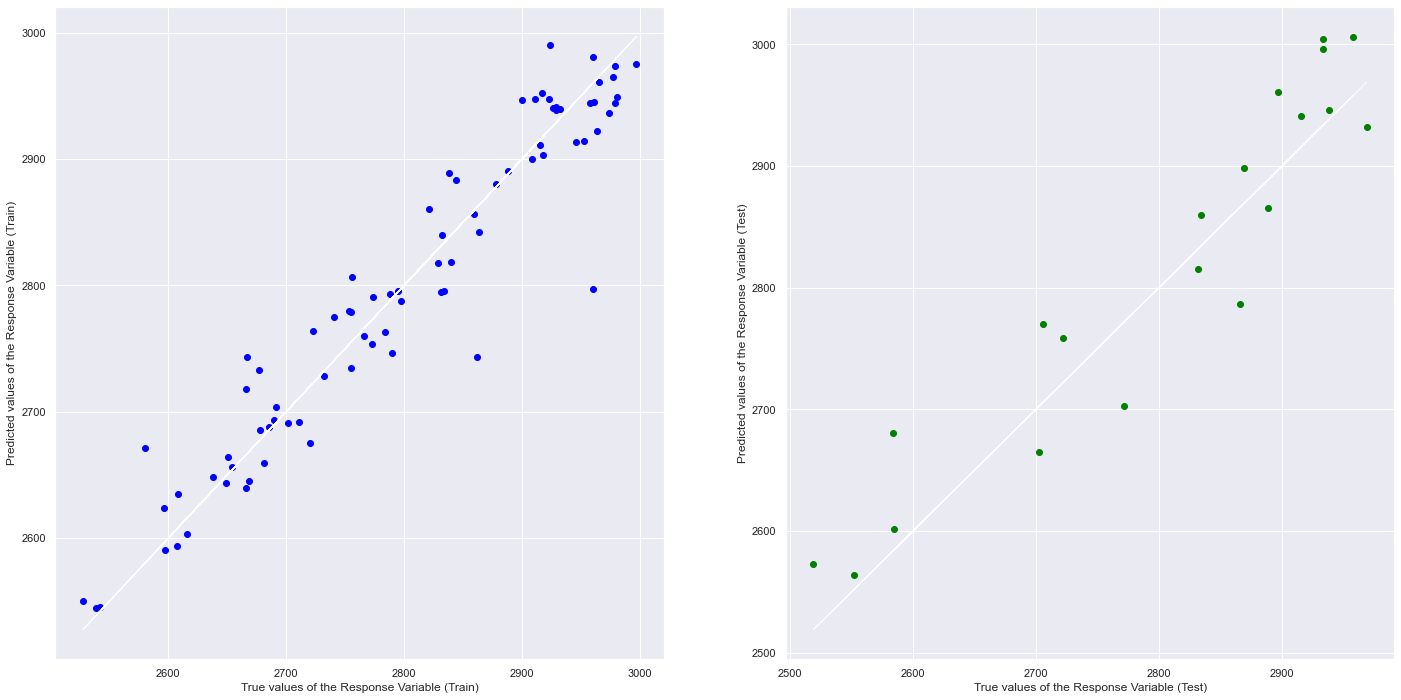

In [6]:
# Predict Response values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression model

In [7]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9199063081327383
Mean Squared Error (MSE) 	: 1346.759797342725

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8766962687206961
Mean Squared Error (MSE) 	: 2522.8301766282466



In [ ]:
# Using Only the other 4 Tech Stocks
X = pd.concat([AMZN["4. close"], AAPL["4. close"], 
               META["4. close"], MSFT["4. close"], axis=1)
y = GOOGL["4. close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

In [ ]:
# Using Only the 5 Healthcare Stocks
X = pd.concat([CVS["4. close"], UNH["4. close"], 
               MCK["4. close"], ABC["4. close"], 
               CI["4. close"]], axis=1)
y = GOOGL["4. close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)